In [24]:
# import all necessary libraries

# pandas for data analysis
import pandas as pd
# numpy for machine learning/statistics
import numpy as np
# seaborn for statistical visualizations
import seaborn as sns
# using pyplot modulus under matplotlib library which is used to create plots/visualizations
import matplotlib.pyplot as plt

# use inline feature so plots/charts display directly in jupyter cells
%matplotlib inline

In [25]:
# use df as dataframe to store the titanic dataset already within seaborn
df = sns.load_dataset("titanic")

# use head to display first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
# analyze the dataset

# shape: how many rows x columns
df.shape

(891, 15)

In [27]:
# analyze the dataset

# columns: column names
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [28]:
# analyze the dataset

# info: data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [29]:
# analyze the dataset

# describe: statistical summary
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# analyze the dataset

# isnull().sum(): sum of empty values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [31]:
# cleaning the data

# fill in missing age values with median age
df['age'] = df['age'].fillna(df['age'].median())

# fill in missing embarked values with most common value, [0] extacts the first mode if several modes exist
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# fill in missing embark_town values with most common town
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# drop deck column - too many missing values is unhelpful
df = df.drop(columns=['deck'])

# check all missing values were handled
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


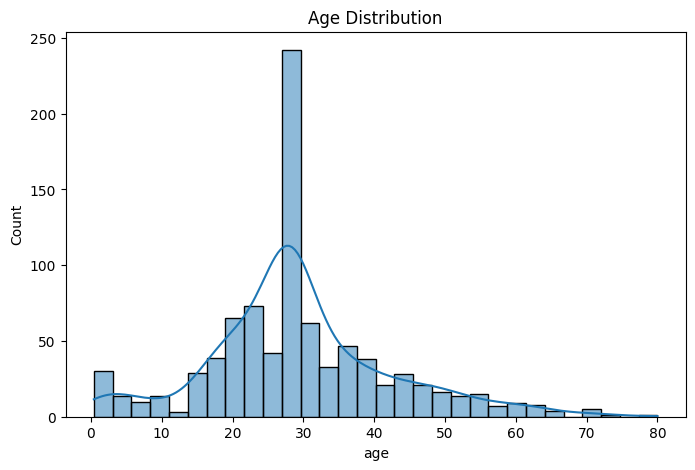

In [39]:
# exploratory data analysis
# age distribution

# plot a figure that's 8 inches wide and 5 inches tall
plt.figure(figsize=(8, 5))

# create a histogram out of the age column (used as the x-axis) in the df, with a KDE curve overlayed on top of it
sns.histplot(data=df, x='age', kde=True)

# title the plot
plt.title('Age Distribution')

# display the plot
plt.show()


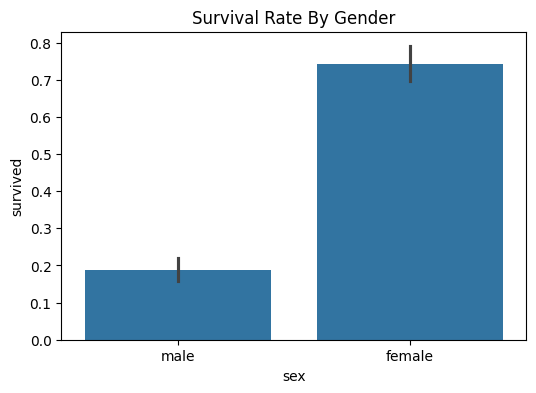

In [38]:
# exploratory data analysis
# survival by gender

# plot a figure that's 6 inches wide and 4 inches tall
plt.figure(figsize=(6, 4))

# plot a bar plot using the df data and the x-axis as sex and the y-axis as survival
sns.barplot(data=df, x='sex', y='survived')

# title the plot
plt.title('Survival Rate By Gender')

# display plot
plt.show()

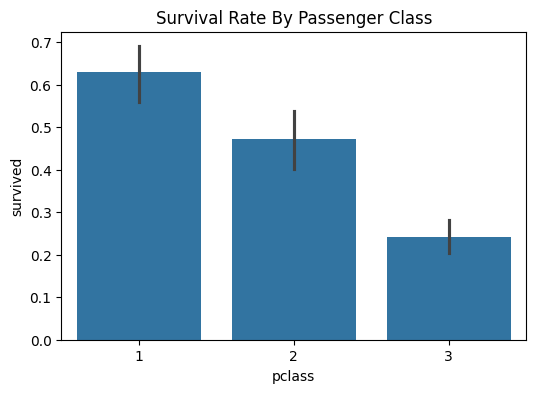

In [37]:
# exploratory data analysis
# survival by passenger class

# plot a figure that's 6 inches wide and 4 inches tall
plt.figure(figsize=(6, 4))

# plot a bar plot using the df data and the x-axis as passenger class and the y-axis as survival
sns.barplot(data=df, x='pclass', y='survived')

# title the plot
plt.title('Survival Rate By Passenger Class')

# display plot
plt.show()

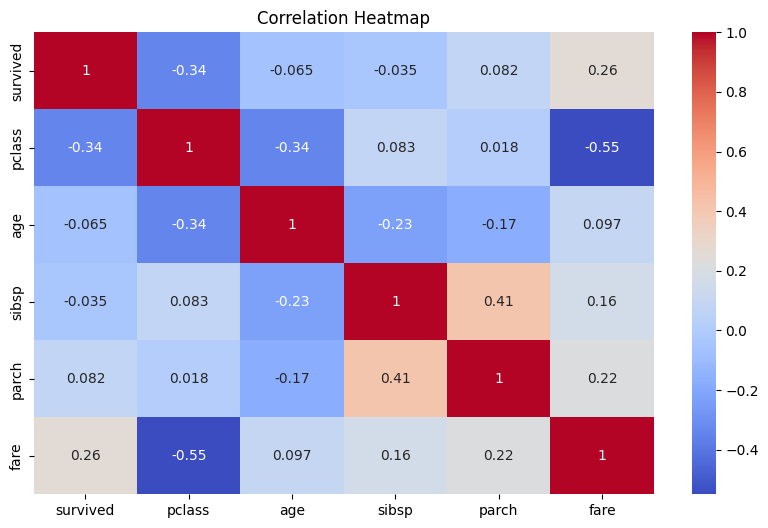

In [41]:
# exploratory data analysis
# correlation heatmap

# plot a figure that's 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# create a correlation heatmap for all numerical data with annotations on the cells and the coolwarm schema
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

# title the heatmap
plt.title('Correlation Heatmap')

# display heatmap
plt.show()

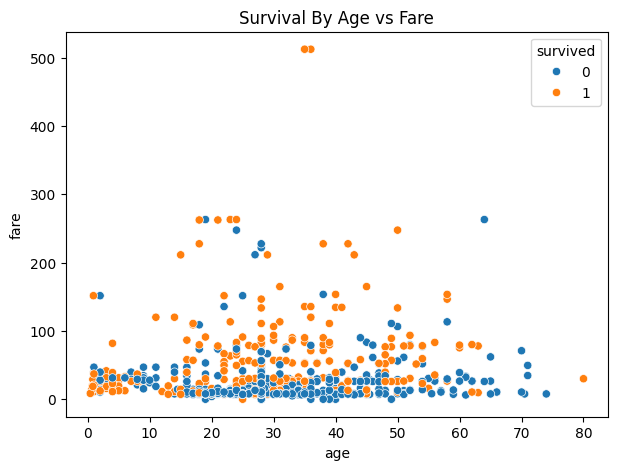

In [42]:
# exploratory data analysis
# survival by age vs fare

# plot a figure that's 7 inches wide and 5 inches tall
plt.figure(figsize=(7, 5))

# plot a scatterplot showing survival by age vs fare, using age as the x-axis, fare as the y-axis, and hueing for survival
sns.scatterplot(data=df, x='age', y='fare', hue='survived')

# title the scatterplot
plt.title('Survival By Age vs Fare')

# display plot
plt.show()

Key Insights From Titanic Data Set EDA:

- The average passenger age was around 29, with a wide range. The
youngest was under a year old and the oldest was 80.

- Females survived at a higher rate compared to males

- First class passengers survived at a higher rate compared to second class and first class passengers, while second class passengers also survived at a higher rate than first class passengers.

- No strong correlation between age and survival

- Fare price strongly correlated to survival, as higher-paying passengers survived at a higher rate

- Missing values from age, deck, and embark city were handled prior to analysis